In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def cum_prob(func, begin, end, deltax, **kwargs):
    x = np.arange(begin, end, deltax)
    xprime = np.arange(begin+deltax, end+deltax, deltax)
    y = func(x, **kwargs)
    yprime = func(xprime, **kwargs)
    y_cum = np.sum(y+yprime) * deltax/2
    return y_cum

In [29]:
from scipy.stats import norm
def gauss_func(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)
mean = 1
sigma=2
area1 = cum_prob(gauss_func, mean-sigma, mean+sigma, 0.00001, mu=mean, sigma=sigma)
area2 = cum_prob(gauss_func, mean-2*sigma, mean+2*sigma, 0.00001, mu=mean, sigma=sigma)
print(area1)
print(area2)

0.6826894921369822
0.9544997360983536


Text(0.5, 1.0, 'Gaussian with mean=1, sigma=2')

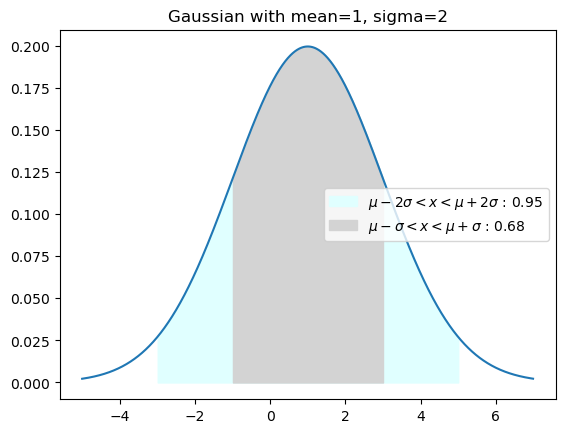

In [36]:
x = np.arange(-5,7,0.01)
plt.plot(x, gauss_func(x, mu=mean, sigma=sigma))
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>mean-2*sigma) & (x<mean+2*sigma), color='lightcyan', \
                  label=f"$\mu-2\sigma < x < \mu+2\sigma$ : {area2:.2f}")
plt.fill_between(x, gauss_func(x, mu=mean, sigma=sigma), where=(x>mean-sigma) & (x<mean+sigma), color='lightgray', \
                  label=f"$\mu-\sigma < x < \mu+\sigma$ : {area1:.2f}")
plt.legend()
plt.title('Gaussian with mean=1, sigma=2')

In [57]:
xarr2 = np.arange(0., 7, 0.01)
xarrsig = xarr2 * sigma + mean
yarr2 = []
for i in range(len(xarrsig)):
    integrand = cum_prob(gauss_func, -20, xarr2[i], 0.01, mu=mean, sigma=sigma)
yarr2 = np.array(yarr2)
print(yarr2[yarr2>=0.95][0], xarr2[yarr2>=0.95][0])
print(yarr2[yarr2>=0.99][0], xarr2[yarr2>=0.99][0])

ValueError: operands could not be broadcast together with shapes (2002,) (2001,) 